# Assignment 2

In the data project we have desided to investigate how the total consumption of different socioeconomic groups changes, when the consumer prices change. We use the Consumer Price Index (CPI) as the measure for inflation, since it is a good indicator, illustation the change in price for a specific large group of good. We are doing this for the time period 2006 to 2021 for the real prices. We use statistics from Danmarks Statistik and download it as API. We use table FU04 for the total consumption data and PRIS112 for CPI. 

In [1]:
#loading packages and plot figure layout
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

#Loading The DST API wrapper (not defined as code, because it has been installed already)
# installeret %pip install git+https://github.com/alemartinello/dstapi

#downloading a package 'a wrapper for multiple APIs' with a pandas interface (not defined as code, because it has been installed already)
# installeret %pip install pandas-datareader

#Importing package that allows us to manage dates and time
import datetime  
import pandas_datareader
from dstapi import DstApi

#importing the venn diagram package, if a venn diagram is needed
#%pip install matplotlib-venn
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import plotly.graph_objects as go


We want to check how the different socio economic groups react to changes in prices. We check the consumption behavior through the changes in the different households total consumption. Therefore we import table FU04 from Danmarks Statistik, which shows these changes:

In [2]:
#importing data fom DST
ind = DstApi('FU04') 
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table FU04: Consumption by group of consumption, socioeconomic status, price unit and time
Last update: 2023-03-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KONSUMGRP,47,1000,CONSUMPTION TOTAL,127000,12.7 Other services n.e.c.,False
1,SOCIO,9,2001,Average Households,3080,Other not economically active,False
2,PRISENHED,2,AARPRIS,Current prices,08PRIS,Real prices,False
3,Tid,28,1994,1994,2021,2021,True


Now we print all the data and its variables, so that we can find the variable ID's. We are doing this because the ID's are needed, when we have to clean the data for our purpose of the project. 

In [3]:
# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))

KONSUMGRP:


,id,text
0,1000,CONSUMPTION TOTAL
1,011000,01.1 Food
2,012000,01.2 Non-alcoholic beverages
3,021000,02.1 Alcoholic beverages
4,022000,02.2 Tobacco
5,023000,02.3 Narcotics
6,031000,03.1 Clothing
7,032000,03.2 Footwear
8,041000,04.1 Actual rentals for housing
9,042000,04.2 Imputed rentals for housing


SOCIO:


,id,text
0,2001,Average Households
1,3010,Selfemployed
2,3020,Employees - upper level
3,3030,Employees - medium level
4,3040,Employees - basic level
5,3050,Unemployed
6,3060,Receiving education
7,3070,Pensioners and early retirement
8,3080,Other not economically active


PRISENHED:


,id,text
0,AARPRIS,Current prices
1,08PRIS,Real prices


Tid:


,id,text
0,1994,1994
1,1995,1995
2,1996,1996
3,1997,1997
4,1998,1998
5,1999,1999
6,2000,2000
7,2001,2001
8,2002,2002
9,2003,2003


With the following code we print the base parameters and groups to easily clean data: 


In [4]:
# The define_base_params selescts all available values for each variable
params = ind._define_base_params(language='en')
params

{'table': 'fu04',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KONSUMGRP', 'values': ['*']},
  {'code': 'SOCIO', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In the output above we will see * which means that it will select every value in every variable group. We will try to cut down data using the data ID's from before. 

We only keep 'Total Consumption' in the "KONSUMGRP", because this is the only consumption group, that we are investigating. At the same time we choose every socioeconomic group, define our data between 2006 and 2021, and we are getting our data in real prices, tax included. 

The table values are DKK per household. 

In [5]:
params = {'table': 'fu04',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KONSUMGRP', 'values': ['1000']},
  {'code': 'SOCIO', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['08PRIS']},
  {'code': 'Tid', 'values': ['>2005<=2021']}]}

We now print the first 5 lines to check, that we have correctly cleaned the data: 

In [6]:
all_ind = ind.get_data(params=params)
all_ind.head(5)

,KONSUMGRP,SOCIO,PRISENHED,TID,INDHOLD
0,CONSUMPTION TOTAL,Average Households,Real prices,2019,316611
1,CONSUMPTION TOTAL,Selfemployed,Real prices,2019,337411
2,CONSUMPTION TOTAL,Employees - upper level,Real prices,2019,479922
3,CONSUMPTION TOTAL,Employees - medium level,Real prices,2019,404808
4,CONSUMPTION TOTAL,Employees - basic level,Real prices,2019,323232


We sort the data by Socio group, time and consumption: 

In [7]:
all_ind.sort_values(by=['SOCIO', 'TID', 'KONSUMGRP'], inplace=True)
all_ind.head(100)

,KONSUMGRP,SOCIO,PRISENHED,TID,INDHOLD
99,CONSUMPTION TOTAL,Average Households,Real prices,2006,344321
35,CONSUMPTION TOTAL,Average Households,Real prices,2007,350367
108,CONSUMPTION TOTAL,Average Households,Real prices,2008,340824
36,CONSUMPTION TOTAL,Average Households,Real prices,2009,316161
72,CONSUMPTION TOTAL,Average Households,Real prices,2010,325968
...,...,...,...,...,...
16,CONSUMPTION TOTAL,Pensioners and early retirement,Real prices,2021,252906
105,CONSUMPTION TOTAL,Receiving education,Real prices,2006,181520
32,CONSUMPTION TOTAL,Receiving education,Real prices,2007,179136
114,CONSUMPTION TOTAL,Receiving education,Real prices,2008,161829


and now we changes the order of the columns, so that the socio group is first, then the year, and then consumption group followed by the values of the total consumption: 

In [8]:
all_ind_sort = all_ind.loc[:, ['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD']]
all_ind_sort.head()

,SOCIO,TID,KONSUMGRP,INDHOLD
99,Average Households,2006,CONSUMPTION TOTAL,344321
35,Average Households,2007,CONSUMPTION TOTAL,350367
108,Average Households,2008,CONSUMPTION TOTAL,340824
36,Average Households,2009,CONSUMPTION TOTAL,316161
72,Average Households,2010,CONSUMPTION TOTAL,325968


Making sure, that we are only left with the total consumption in the group KONSUMGRP, and saving the table output: 

In [9]:
Total_consumption1 = all_ind_sort.KONSUMGRP.str.contains('CONSUMPTION TOTAL') # df med true, false values
Total_consumption1_table = all_ind_sort.loc[Total_consumption1,['SOCIO', 'TID', 'KONSUMGRP', 'INDHOLD']]
Total_consumption1_table 

,SOCIO,TID,KONSUMGRP,INDHOLD
99,Average Households,2006,CONSUMPTION TOTAL,344321
35,Average Households,2007,CONSUMPTION TOTAL,350367
108,Average Households,2008,CONSUMPTION TOTAL,340824
36,Average Households,2009,CONSUMPTION TOTAL,316161
72,Average Households,2010,CONSUMPTION TOTAL,325968
...,...,...,...,...
131,Unemployed,2017,CONSUMPTION TOTAL,195272
68,Unemployed,2018,CONSUMPTION TOTAL,177620
5,Unemployed,2019,CONSUMPTION TOTAL,175521
23,Unemployed,2020,CONSUMPTION TOTAL,199903


Defining the table with a new name for making following codes shorter, and checking it has been done correctly:

In [10]:
df = Total_consumption1_table.copy()

In [11]:
df.head()

,SOCIO,TID,KONSUMGRP,INDHOLD
99,Average Households,2006,CONSUMPTION TOTAL,344321
35,Average Households,2007,CONSUMPTION TOTAL,350367
108,Average Households,2008,CONSUMPTION TOTAL,340824
36,Average Households,2009,CONSUMPTION TOTAL,316161
72,Average Households,2010,CONSUMPTION TOTAL,325968


Now we create a variable, that returns the value of Total consumption for each socioeconomic group, and a variable defining the years for our x axis: 

In [12]:
def return_indhold_for_socio(df, socio):
    values = df[df["SOCIO"] == socio]["INDHOLD"].values
    
    return values


years = np.arange(2006, 2022)


Now we make the plot for our data:

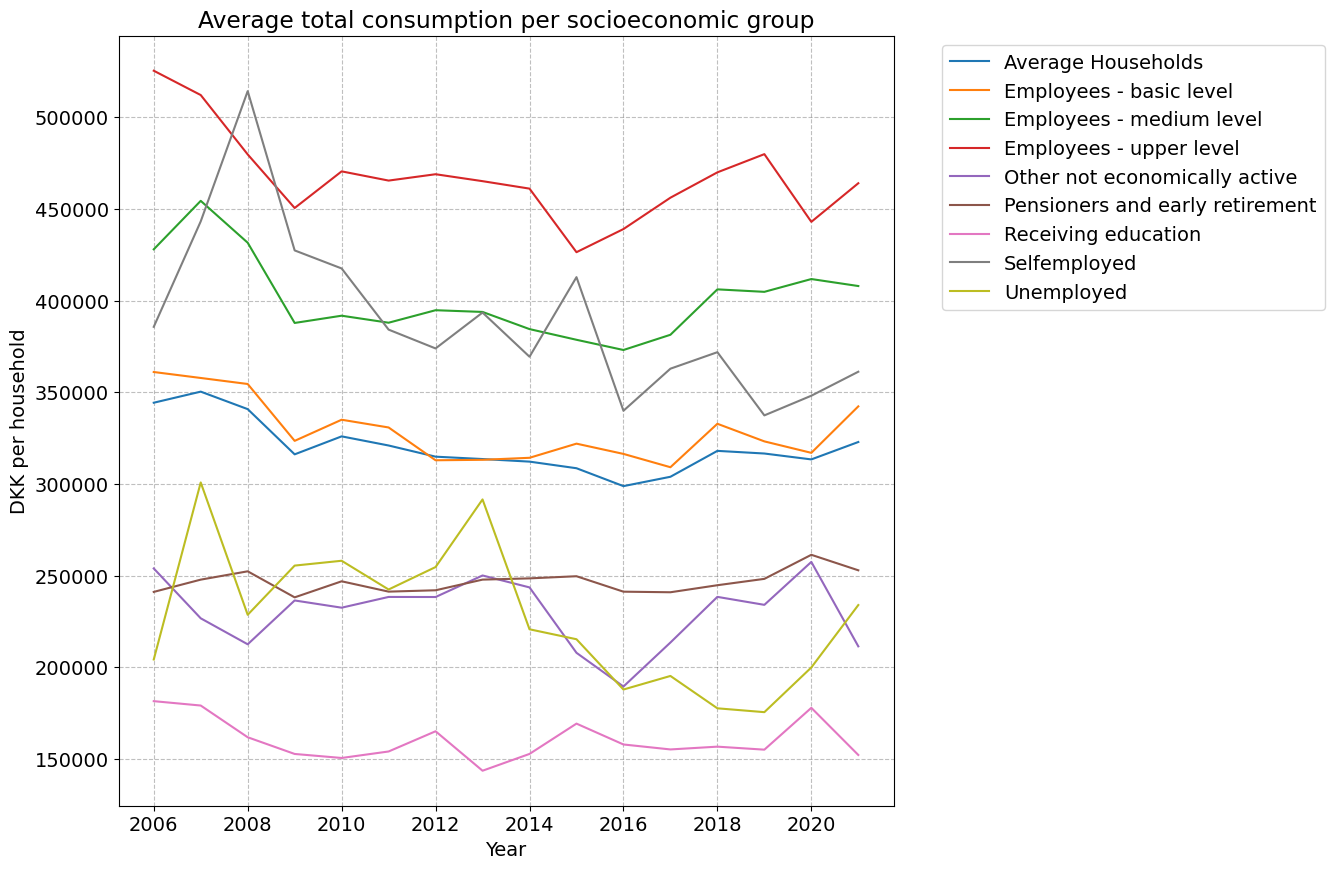

In [13]:
# Define the list of groups
groups = ['Average Households', 'Employees - basic level', 'Employees - medium level',
          'Employees - upper level', 'Other not economically active',
          'Pensioners and early retirement', 'Receiving education', 'Selfemployed',
          'Unemployed']

# Create a single plot with a line for each group
fig, ax = plt.subplots(figsize=(10,10))
for group in groups:
    values = return_indhold_for_socio(df, group)
    ax.plot(years, values, label=group)

# Add legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Year")
plt.ylabel("DKK per household")


plt.title("Average total consumption per socioeconomic group")
# Show the plot
plt.show()




We now create a bar chart for the average household's consumption during the entire period for each socioeconomic group.

Text(0.5, 1.0, 'Annually average household total consumption in DKK from 2006 to 2021')

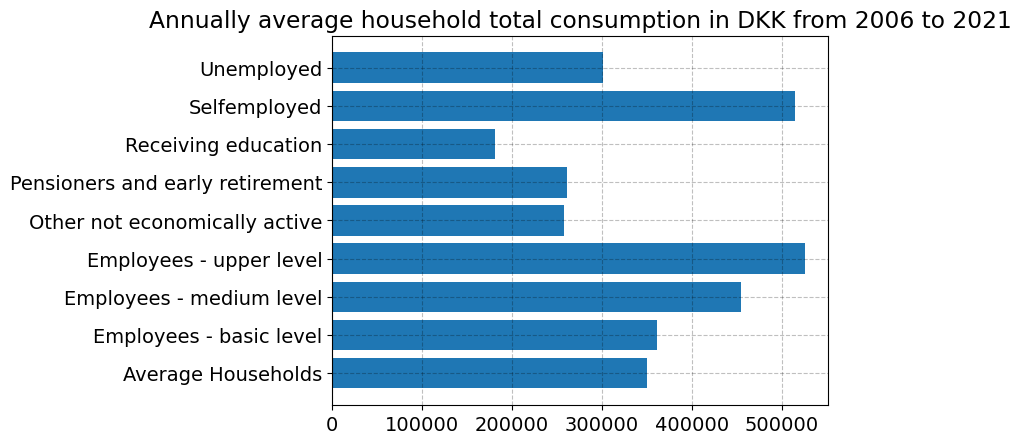

In [14]:
plt.barh(df["SOCIO"].values, df["INDHOLD"].values)
plt.title("Annually average household total consumption in DKK from 2006 to 2021")

Three socioeconomic groups, specifically those receiving education, pensioners and early retirement, and other not economically active, exhibit an annually average total household consumption from 2006 to 2021, roughly below DKK 250.000. Interestingly, this amount is nearly DKK 50.000 lower compared to the socioeconomic group of the unemployed. While this may seem surprising at first, it could be explained by, that the unemployed individuals might have had savings from their previous jobs, enabling them to sustain a higher level of consumption. This may not be the case for the former socioeconomic groups, leading to their average consumption being nearly 20 percent lower than the annually consumption of the unemployed.

Conversely, it comes as no surprise that the selfemployed and employees - upper level have the highest average household consumption, surpassing DKK 500.000. Following closely are employees - medium level, which aligns with expectations. The socioeconomic group closest to the average household consumption is the employees - basic level, with an annual average of approximately DKK 360.000, approximately DKK 10.000 above the average household of the economy.

# Merging data

Now we want to import data from DST that shows the consumer price index for the same time period with index 2015 = 100. To import this and clean the data, we are using the same codes as above, why they won't be explained. We are using the table PRIS112 from Danmarks Statistik:

In [15]:
#importing data
ind2 = DstApi('PRIS112')
tabsum2 = ind2.tablesummary(language='en')
display(tabsum2)

Table PRIS112: Consumer price index by main figures and time
Last update: 2023-01-10T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,HOVED,2,1005,"Average, yearly",1010,Annual increase,False
1,Tid,43,1980,1980,2022,2022,True


In [16]:
#printing the variables and their ID's
for variable in tabsum2['variable name']:
    print(variable+':')
    display(ind2.variable_levels(variable, language='en'))


HOVED:


,id,text
0,1005,"Average, yearly"
1,1010,Annual increase


Tid:


,id,text
0,1980,1980
1,1981,1981
2,1982,1982
3,1983,1983
4,1984,1984
5,1985,1985
6,1986,1986
7,1987,1987
8,1988,1988
9,1989,1989


In [17]:
#printing the groups to easily clean the data:
params2 = ind2._define_base_params(language='en')
params2

{'table': 'pris112',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HOVED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [18]:
#cleaning data to only include Average increase in CPI in the period 2006 to 2021
params2 = {'table': 'pris112',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HOVED', 'values': ['1010']},
  {'code': 'Tid', 'values': ['>2005<=2021']}]}

In [19]:
#printing the data
all_ind2 = ind2.get_data(params=params2)
all_ind2.head(5)

,HOVED,TID,INDHOLD
0,Annual increase,2006,1.9
1,Annual increase,2007,1.7
2,Annual increase,2008,3.4
3,Annual increase,2009,1.3
4,Annual increase,2010,2.3


In [20]:
#sort data:
all_ind2_sort = all_ind2.loc[:, ['TID', 'HOVED', 'INDHOLD']]
all_ind2_sort.head(30)

,TID,HOVED,INDHOLD
0,2006,Annual increase,1.9
1,2007,Annual increase,1.7
2,2008,Annual increase,3.4
3,2009,Annual increase,1.3
4,2010,Annual increase,2.3
5,2011,Annual increase,2.8
6,2012,Annual increase,2.4
7,2013,Annual increase,0.8
8,2014,Annual increase,0.6
9,2015,Annual increase,0.5


Again we will just make sure, that we are only importing the 'Annual increase' data:

In [21]:
CPI = all_ind2_sort.HOVED.str.contains('Annual increase') # df med true, false values
CPI_table = all_ind2_sort.loc[CPI,['TID', 'HOVED', 'INDHOLD']]
CPI_table

,TID,HOVED,INDHOLD
0,2006,Annual increase,1.9
1,2007,Annual increase,1.7
2,2008,Annual increase,3.4
3,2009,Annual increase,1.3
4,2010,Annual increase,2.3
5,2011,Annual increase,2.8
6,2012,Annual increase,2.4
7,2013,Annual increase,0.8
8,2014,Annual increase,0.6
9,2015,Annual increase,0.5


And again we are defining the cleaned data with a shorter name:

In [22]:
df2 = CPI_table.copy()

In [23]:
df2.head()

,TID,HOVED,INDHOLD
0,2006,Annual increase,1.9
1,2007,Annual increase,1.7
2,2008,Annual increase,3.4
3,2009,Annual increase,1.3
4,2010,Annual increase,2.3


Now we merge our data set's so that we can include them in the same table and the same figure to make the analysis of the consumption behavior when prices are changing:

In [24]:
#Do an inner merge, so that we make sure, that we got data for all years and the years match up 
merge1 = pd.merge(df,df2, how='inner', on=['TID'])
merge1

,SOCIO,TID,KONSUMGRP,INDHOLD_x,HOVED,INDHOLD_y
0,Average Households,2006,CONSUMPTION TOTAL,344321,Annual increase,1.9
1,Employees - basic level,2006,CONSUMPTION TOTAL,361073,Annual increase,1.9
2,Employees - medium level,2006,CONSUMPTION TOTAL,428001,Annual increase,1.9
3,Employees - upper level,2006,CONSUMPTION TOTAL,525429,Annual increase,1.9
4,Other not economically active,2006,CONSUMPTION TOTAL,253911,Annual increase,1.9
...,...,...,...,...,...,...
139,Other not economically active,2021,CONSUMPTION TOTAL,211424,Annual increase,1.9
140,Pensioners and early retirement,2021,CONSUMPTION TOTAL,252906,Annual increase,1.9
141,Receiving education,2021,CONSUMPTION TOTAL,152169,Annual increase,1.9
142,Selfemployed,2021,CONSUMPTION TOTAL,361228,Annual increase,1.9


The inner merge will create several variables for the same year regarding the CPI, but we will fix this when we are plotting the data:

In [25]:
merge1.sort_values(by=['TID','HOVED','SOCIO','INDHOLD_x','INDHOLD_y'], inplace=True)
merge1.head(30)

,SOCIO,TID,KONSUMGRP,INDHOLD_x,HOVED,INDHOLD_y
0,Average Households,2006,CONSUMPTION TOTAL,344321,Annual increase,1.9
1,Employees - basic level,2006,CONSUMPTION TOTAL,361073,Annual increase,1.9
2,Employees - medium level,2006,CONSUMPTION TOTAL,428001,Annual increase,1.9
3,Employees - upper level,2006,CONSUMPTION TOTAL,525429,Annual increase,1.9
4,Other not economically active,2006,CONSUMPTION TOTAL,253911,Annual increase,1.9
5,Pensioners and early retirement,2006,CONSUMPTION TOTAL,241120,Annual increase,1.9
6,Receiving education,2006,CONSUMPTION TOTAL,181520,Annual increase,1.9
7,Selfemployed,2006,CONSUMPTION TOTAL,385725,Annual increase,1.9
8,Unemployed,2006,CONSUMPTION TOTAL,204257,Annual increase,1.9
9,Average Households,2007,CONSUMPTION TOTAL,350367,Annual increase,1.7


We sort the data again and create the same groups as before for the different socioeconomic groups and their total consumption values and the variable for the timeframe:

In [26]:
merge1_sort = merge1.loc[:, ['TID','SOCIO','INDHOLD_x','HOVED','INDHOLD_y']]
merge1_sort.head()

,TID,SOCIO,INDHOLD_x,HOVED,INDHOLD_y
0,2006,Average Households,344321,Annual increase,1.9
1,2006,Employees - basic level,361073,Annual increase,1.9
2,2006,Employees - medium level,428001,Annual increase,1.9
3,2006,Employees - upper level,525429,Annual increase,1.9
4,2006,Other not economically active,253911,Annual increase,1.9


# Data visualisation of the merged data
To visualise and analyse our data, we create and interactive figure, that shows the different socioeconomic groups compared to the consumer price index. From the dropdown menu, you are able to choose the socioeconomic group, that you want to analyse. \
\
*Please note, that the interactive figure can only be shown in the Visual Studio Code, and therefore not online*

In [27]:
import ipywidgets as widgets

#first we create the needed variables for the different axis 
def return_indhold_for_sociom(merge1_sort, socio):
    valuesm = merge1_sort[merge1_sort["SOCIO"] == socio]["INDHOLD_x"].values
    
    return valuesm

yearsm = np.arange(2006, 2022)

# now we create the plot of the figure, but not yet the dropdown menu
def _plot_timeseries(dataframe, variable):
    fig, ax1 = plt.subplots(figsize=(10,10))

    years = dataframe['TID'].unique()
    line1, = ax1.plot(years, merge1_sort[merge1_sort["SOCIO"] == variable]["INDHOLD_x"].values)
    ax2 = ax1.twinx()
    CPIdata = pd.to_numeric(merge1_sort['INDHOLD_y'], errors='coerce').groupby(merge1_sort['TID']).mean()
    line2, = ax2.plot(years, CPIdata, color='black', linestyle='--')

    ax1.set_ylim(bottom=140000, top=540000)

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total consumption in DKK per household')
    ax2.set_ylabel('CPI')

    ax2.set_ylim(bottom=0.0, top=4)
    print(variable)

    lines = [line1, line2]
    labels = [variable, 'CPI (right axis)']
    plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.show()

#now we create the dropdown menu
def plot_timeseries(dataframe):
    widgets.interact(_plot_timeseries, dataframe=widgets.fixed(merge1_sort), variable=widgets.Dropdown(description='Socio group', options=list(dataframe['SOCIO'].unique()), value=list(dataframe['SOCIO'].unique())[0]))

#now we plot the interactive figure
plot_timeseries(merge1_sort)

interactive(children=(Dropdown(description='Socio group', options=('Average Households', 'Employees - basic le…

# Analysis of the data
Abovr we see several patterns and trends emerge among different socioeconomic groups. 

The students' group exhibits a relatively consistent consumption pattern that does not vary significantly with inflation levels. However, it is observed that when prices rise, the consumption of students tends to decline. This can be caused by students substituting to less pricy alternatives and hereby spending less money even though prices are rising. As they typically spend their entire income each month, they are forced to substitute products rather than reduce their overall consumption. For many of them, reducing consumption might not be a possibility. Similar reasons might explain the cunsumption pattern of the pensioners and early retirement group. The consumption levels of these two socioeconomic groups are considerably below the average households', with pensioners being approximately DKK 100.000 lower and students approximately DKK 200.000 lower in nominal terms.

In contrast, the basic level employees closely align with the average household consumption pattern, and their consumption pattern closely follows that of the Consumer Price Index (CPI). This can be attributed to the basic level employees having slightly more economic flexibility compared to the other two groups mentioned earlier.

It is important to note that due to the data being in nominal changes rather than percentages, a decline in total consumption for students and high level employees affects each group differently. High level employees typically have fewer difficulties in adjusting their spending and are not as exposed to having to substitute goods, while students lack the same flexibility. As a result, in the figure, we observe that from 2006 to 2009, high level employees experienced a drop in total consumption from approximately DKK 540.000 to DKK 450.000, while students went from approximately DKK 180.000 to DKK 150.000. Another noticeable difference between these two groups is their response to the inflation rate from 2019 onwards. As CPI decreased by approximately 0,4, students' total consumption increased while the total consumption of high level employees declined. This could be explained by higher income groups maintaining their consumption behavior and purchasing the same amount of goods even though prices fluctuate, whereas lower income groups may spend more when prices are relatively lower compared to the previous year.


# Conclusion
The behavior of consumers in response to changes in the price index varies depending on the socioeconomic group they belong to. Higher income groups tend to accept higher prices without significant changes in their consumption patterns, whereas lower income groups exhibit more responsive behavior and adjust their consumption choices accordingly, so that they keep the same level of consumption even though the prices fluctuates. Lower income groups tend to substitute goods for cheaper alternatives when prices increase and may spend more on different products when prices rise. These findings highlight the different ways in which various socioeconomic groups adapt to changes in the price index, emphasizing the importance of considering income levels and socioeconomic status when analyzing consumer responses to inflation.